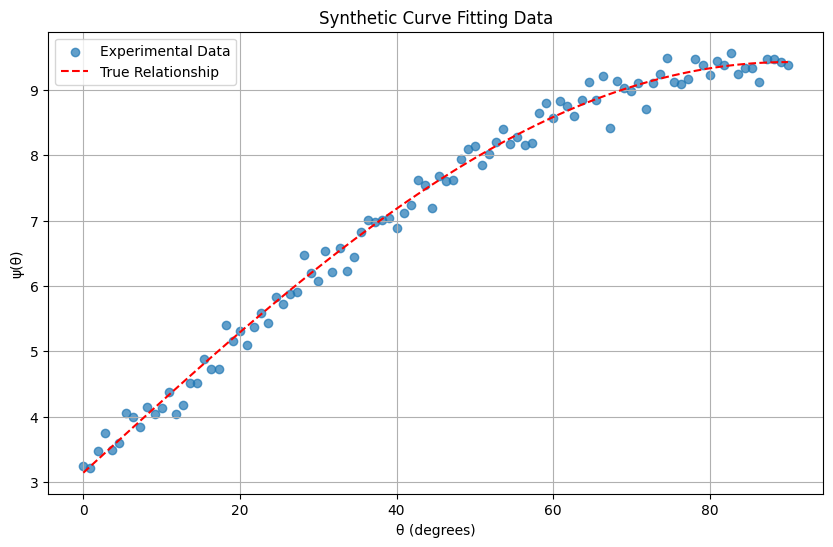

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# Parameters
# ---------------------------
np.random.seed(42)  # For reproducibility
n_points = 100      # Number of data points
noise_level = 0.2   # Gaussian noise standard deviation

# True parameters (hidden from fitting algorithm)
a_true = 2 * np.pi        # ≈ 4πh_rh_t/λR (example value)
b_true = np.pi       # ≈ π

# ---------------------------
# Generate Data
# ---------------------------
# Theta values (0-90 degrees)
theta_deg = np.linspace(0, 90, n_points)
theta_rad = np.deg2rad(theta_deg)  # Convert to radians for calculations

# Ideal relationship
psi_ideal = a_true * np.sin(theta_rad) + b_true

# Add experimental noise
psi_noisy = psi_ideal + np.random.normal(0, noise_level, n_points)

# ---------------------------
# Save as DataFrame
# ---------------------------
df = pd.DataFrame({
    'theta_deg': theta_deg,
    'theta_rad': theta_rad,
    'psi': psi_noisy
})

# Save to CSV
df.to_csv('curve_fitting_data2.csv', index=False)

# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(10, 6))
plt.scatter(theta_deg, psi_noisy, label='Experimental Data', alpha=0.7)
plt.plot(theta_deg, psi_ideal, 'r--', label='True Relationship')
plt.xlabel('θ (degrees)')
plt.ylabel('ψ(θ)')
plt.title('Synthetic Curve Fitting Data')
plt.legend()
plt.grid(True)
plt.show()

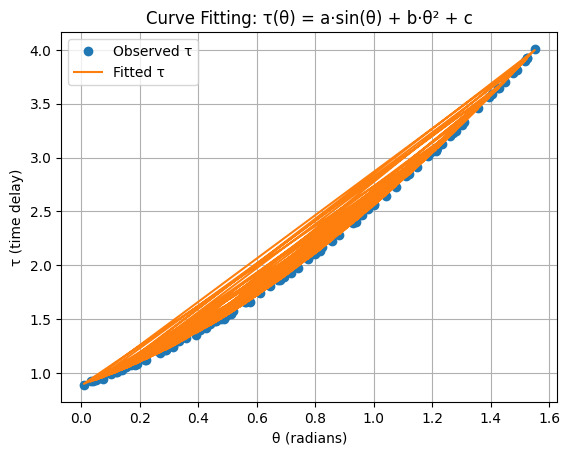

array([0.87535483, 0.92900813, 0.89070806])

In [10]:
import numpy as np
import pandas as pd
from numpy.linalg import lstsq
import matplotlib.pyplot as plt


# Step 1: Define theta values (in radians)
theta = np.random.uniform(0, np.pi/2, 100)

# True parameters
a_true=0.8762
b_true=0.9288
c_true=0.8914

# Generate tau values with small random noise
np.random.seed(42)
noise = np.random.normal(0, 0.01, len(theta))
tau = a_true * np.sin(theta) + b_true * theta**2 + c_true + noise

# Step 2: Construct matrix A for linear least squares
A = np.column_stack([np.sin(theta), theta**2, np.ones_like(theta)])

# Step 3: Solve A p = tau using least squares
p_est, _, _, _ = lstsq(A, tau, rcond=None)

# Predicted tau using fitted model
tau_fit = A @ p_est

# Create table to display
df = pd.DataFrame({
    "θ (rad)": theta,
    "sin(θ)": np.sin(theta),
    "θ²": theta**2,
    "τ (observed)": tau,
    "τ (fitted)": tau_fit
})

# tools.display_dataframe_to_user(name="Curve Fitting Table", dataframe=df)

# Plotting the fit
plt.plot(theta, tau, 'o', label='Observed τ')
plt.plot(theta, tau_fit, '-', label='Fitted τ')
plt.xlabel("θ (radians)")
plt.ylabel("τ (time delay)")
plt.title("Curve Fitting: τ(θ) = a·sin(θ) + b·θ² + c")
plt.legend()
plt.grid(True)
plt.show()

p_est  # Return estimated coefficients [a, b, c]


In [11]:
# Calculate R-squared
ss_total = np.sum((tau - np.mean(tau))**2)
ss_residual = np.sum((tau - tau_fit)**2)
r_squared = 1 - (ss_residual / ss_total)

# Calculate mean squared error
mse = np.mean((tau - tau_fit)**2)

print(f"Estimated parameters: a={p_est[0]:.4f}, b={p_est[1]:.4f}, c={p_est[2]:.4f}")
print(f"True parameters: a={a_true:.4f}, b={b_true:.4f}, c={c_true:.4f}")
print(f"R-squared: {r_squared:.6f}")
print(f"Mean Squared Error: {mse:.6f}")

Estimated parameters: a=0.8754, b=0.9290, c=0.8907
True parameters: a=0.8762, b=0.9288, c=0.8914
R-squared: 0.999906
Mean Squared Error: 0.000082


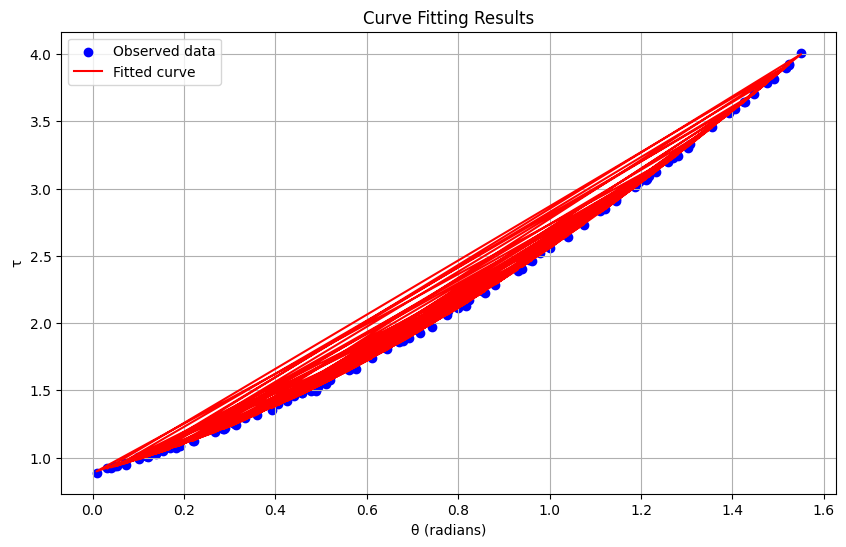

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(theta, tau, color='blue', label='Observed data')
plt.plot(theta, tau_fit, color='red', label='Fitted curve')
plt.xlabel('θ (radians)')
plt.ylabel('τ')
plt.title('Curve Fitting Results')
plt.legend()
plt.grid(True)
plt.show()

Estimated parameters: a=0.8775, b=0.9293, c=0.8902
True parameters: a=0.8762, b=0.9288, c=0.8914
R-squared: 0.999908
Mean Squared Error: 0.000082


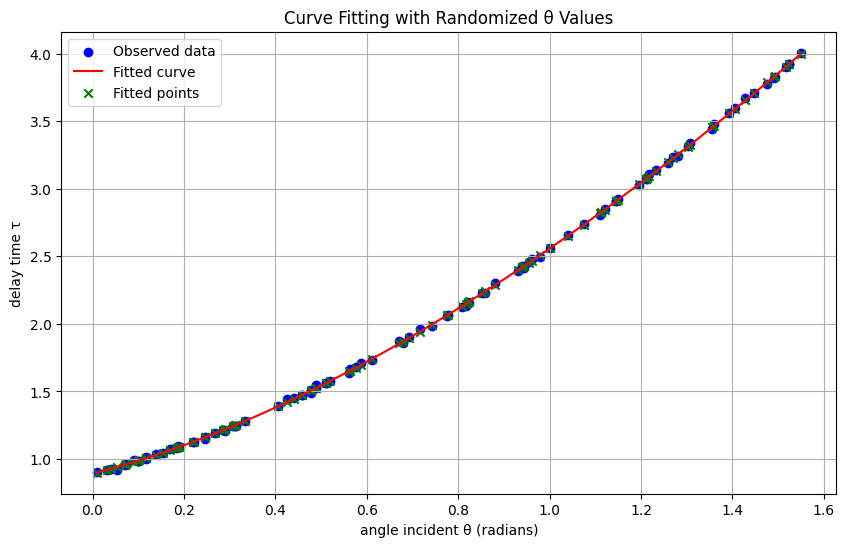

     θ (rad)    sin(θ)        θ²  τ (observed)  τ (fitted)
0   0.008674  0.008674  0.000075      0.899941    0.897906
1   0.032334  0.032328  0.001045      0.917707    0.919564
2   0.039928  0.039918  0.001594      0.928774    0.926734
3   0.054017  0.053991  0.002918      0.921541    0.940313
4   0.071043  0.070983  0.005047      0.956086    0.957202
..       ...       ...       ...           ...         ...
95  1.493379  0.997005  2.230179      3.828208    3.837617
96  1.516811  0.998543  2.300716      3.902458    3.904518
97  1.523020  0.998859  2.319590      3.924447    3.922334
98  1.523531  0.998883  2.321146      3.925269    3.923802
99  1.550198  0.999788  2.403115      4.007699    4.000770

[100 rows x 5 columns]


In [16]:

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Define randomized theta values (in radians)
# Option 1: θ∈[0, π/2] (0° to 90°)
theta = np.random.uniform(0, np.pi/2, 100)  # Using 10 random points

# Option 2: θ∈[0, 2π] (0° to 360°)
# theta = np.random.uniform(0, 2*np.pi, 10)  # Uncomment to use this range instead

# Sort theta for easier visualization (optional)
theta = np.sort(theta)

# True parameters
a_true = 0.8762
b_true = 0.9288
c_true = 0.8914

# Generate tau values with small random noise
noise = np.random.normal(0, 0.01, len(theta))
tau = a_true * np.sin(theta) + b_true * theta**2 + c_true + noise

# Step 2: Construct matrix A for linear least squares
A = np.column_stack([np.sin(theta), theta**2, np.ones_like(theta)])

# Step 3: Solve A p = tau using least squares
p_est, residuals, rank, s = lstsq(A, tau, rcond=None)

# Predicted tau using fitted model
tau_fit = A @ p_est

# Calculate R-squared
ss_total = np.sum((tau - np.mean(tau))**2)
ss_residual = np.sum((tau - tau_fit)**2)
r_squared = 1 - (ss_residual / ss_total)

# Calculate mean squared error
mse = np.mean((tau - tau_fit)**2)

# Create table to display
df = pd.DataFrame({
    "θ (rad)": theta,
    "sin(θ)": np.sin(theta),
    "θ²": theta**2,
    "τ (observed)": tau,
    "τ (fitted)": tau_fit
})

print(f"Estimated parameters: a={p_est[0]:.4f}, b={p_est[1]:.4f}, c={p_est[2]:.4f}")
print(f"True parameters: a={a_true:.4f}, b={b_true:.4f}, c={c_true:.4f}")
print(f"R-squared: {r_squared:.6f}")
print(f"Mean Squared Error: {mse:.6f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(theta, tau, color='blue', label='Observed data')

# Create a smoother curve for visualization
theta_smooth = np.linspace(min(theta), max(theta), 100)
A_smooth = np.column_stack([np.sin(theta_smooth), theta_smooth**2, np.ones_like(theta_smooth)])
tau_smooth = A_smooth @ p_est

plt.plot(theta_smooth, tau_smooth, color='red', label='Fitted curve')
plt.scatter(theta, tau_fit, color='green', marker='x', label='Fitted points')
plt.xlabel('angle incident θ (radians)')
plt.ylabel('delay time τ')
plt.title('Curve Fitting with Randomized θ Values')
plt.legend()
plt.grid(True)
plt.show()

print(df)

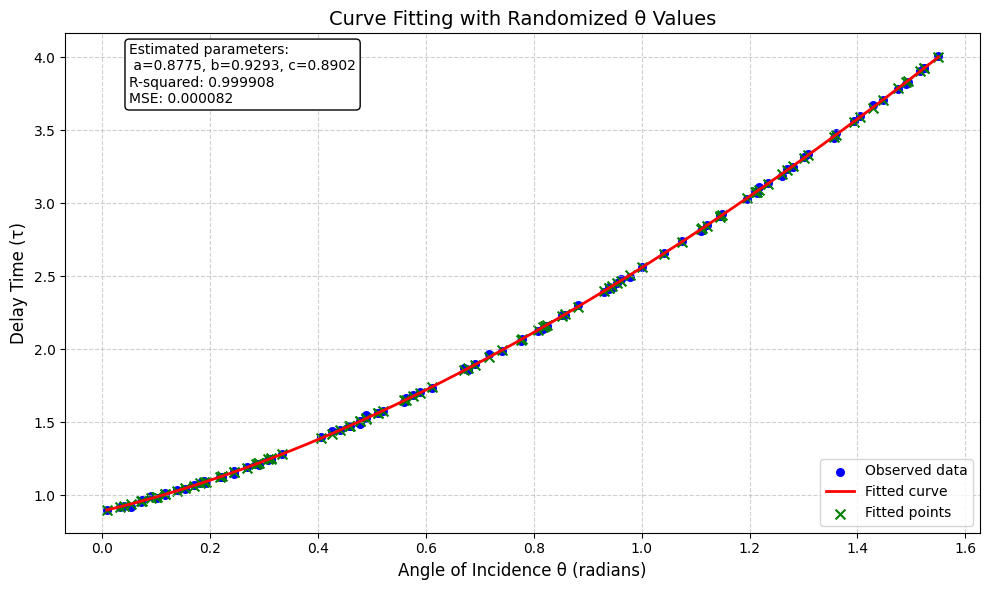

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Recompute τ_fitted for original theta values (if not already computed)
A_fit = np.column_stack([np.sin(theta), theta**2, np.ones_like(theta)])
tau_fit = A_fit @ p_est

# Compute fit metrics
r2 = r2_score(tau, tau_fit)
mse = mean_squared_error(tau, tau_fit)

# Smoother θ for curve
theta_smooth = np.linspace(min(theta), max(theta), 300)
A_smooth = np.column_stack([np.sin(theta_smooth), theta_smooth**2, np.ones_like(theta_smooth)])
tau_smooth = A_smooth @ p_est

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.scatter(theta, tau, color='blue', label='Observed data', s=30)
plt.plot(theta_smooth, tau_smooth, color='red', label='Fitted curve', linewidth=2)
plt.scatter(theta, tau_fit, color='green', marker='x', label='Fitted points', s=50)

# Axis labels
plt.xlabel('Angle of Incidence θ (radians)', fontsize=12)
plt.ylabel('Delay Time (τ)', fontsize=12)
plt.title('Curve Fitting with Randomized θ Values', fontsize=14)

# Fit metrics text
plt.text(0.05, max(tau) * 0.92,
         f"Estimated parameters:\n a={p_est[0]:.4f}, b={p_est[1]:.4f}, c={p_est[2]:.4f}\n"
         f"R-squared: {r2:.6f}\nMSE: {mse:.6f}",
         fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Visual tweaks
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()